Her er min løsning på oppgave 3 fra forrige vurdering. Nederst har jeg utforsket litt på effektivitet og funnet ut at den "manuelle" måten er mest effektiv ut av de tre metodene jeg testet.

© Elias Eichner

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("../20.03.2025/sikkerheit_utf8.csv", sep=";")

# Del 1

In [5]:
df.groupby("Protocol")["Protocol"].count().sort_values(ascending=False)

Protocol
ICMP    13429
UDP     13299
TCP     13272
Name: Protocol, dtype: int64

De tre mest bruke (og eneste brukte) protokollene er ICMP, UDP og TCP. <br>
ICMP er brukt 13429 ganger<br>
UDP er brukt 13299 ganger<br>
TCP er brukt 13272 ganger

# Del 2

Det er 3 ulike typer 'Attack Type'
DDoS utgjør 33.57% av angrepene


<Axes: title={'center': 'Attack Types'}>

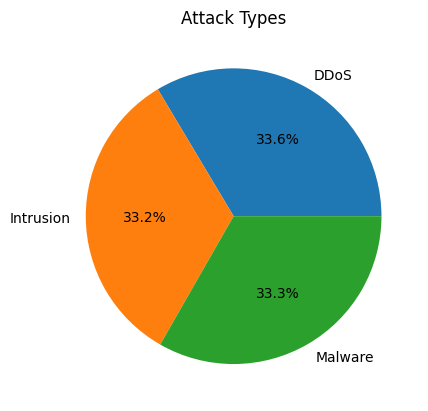

In [6]:
attack_types = df.groupby("Attack Type")["Attack Type"].count()
antall_unike_attack_types = len(attack_types)
DDoS_prosent = attack_types["DDoS"]/len(df["Attack Type"])*100

print(f"Det er {antall_unike_attack_types} ulike typer 'Attack Type'")
print(f"DDoS utgjør {DDoS_prosent}% av angrepene")

# Piechart https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
# Labels https://matplotlib.org/3.1.0/gallery/pie_and_polar_charts/pie_features.html
attack_types.plot.pie(ylabel="", title="Attack Types", autopct='%1.1f%%') 

I datasettet er det tre ulike "attack types", hvorav DDoS utgjør 33,57% av angrepene.

# Del 3

Windows angrep: 17953
Macintosh angrep: 5813


Text(0.5, 0, 'Operativsystem')

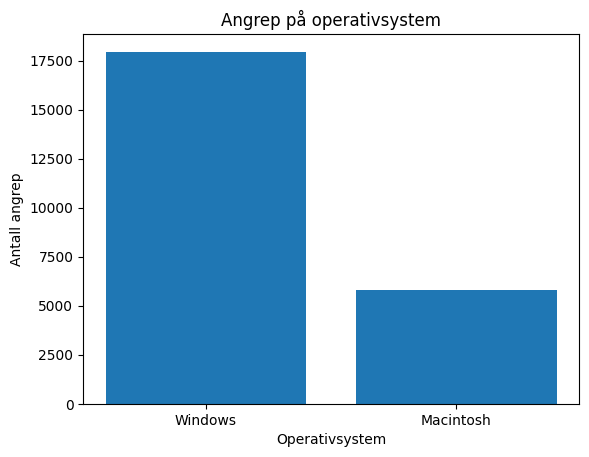

In [7]:

windows_angrep = pd.DataFrame(filter(lambda x: "windows" in x.lower(), df["Device Information"])).count().iloc[0]
macintosh_angrep = pd.DataFrame(filter(lambda x: "macintosh" in x.lower(), df["Device Information"])).count().iloc[0]

print(f"Windows angrep: {windows_angrep}\nMacintosh angrep: {macintosh_angrep}")

plt.title("Angrep på operativsystem")
plt.bar(["Windows", "Macintosh"], [windows_angrep, macintosh_angrep]) # Bar plot https://www.geeksforgeeks.org/bar-plot-in-matplotlib/
plt.ylabel("Antall angrep")
plt.xlabel("Operativsystem")


In [8]:
import timeit

def func1():
    # Fra løsningsforslaget
    macintosh_count = df['Device Information'].str.contains('Macintosh', na=False).sum()
    windows_count = df['Device Information'].str.contains('Windows', na=False).sum()

    return macintosh_count, windows_count

def func2():
    # Min løsning
    macintosh_angrep = pd.DataFrame(filter(lambda x: "macintosh" in x.lower(), df["Device Information"])).count().iloc[0]
    windows_angrep = pd.DataFrame(filter(lambda x: "windows" in x.lower(), df["Device Information"])).count().iloc[0]

    return macintosh_angrep, windows_angrep

print("func1: ", timeit.timeit(func1, number=5000))
print("func2: ", timeit.timeit(func2, number=5000))

func1:  158.41536000010092
func2:  229.86401330004446


In [9]:
def func3():
    # Fra løsningsforslaget
    mac_count = 0
    win_count = 0
    for entry in df["Device Information"]:
        if entry and "Macintosh" in entry:  # Sjekk at entry ikkje er None eller tom
            mac_count += 1
        elif entry and "Windows" in entry:
            win_count += 1
    return mac_count, win_count

print("func3: ", timeit.timeit(func3, number=5000))

func3:  94.44164670002647
